# Loading our dataset

In [1]:
import pandas as pd

In [2]:
poorly_formatted_rows = [2120259, 2446317, 11141080, 11152098, 11152401, 11882086, 12902538, 12935043, 17589538]
df = pd.read_csv('lastfm_data/userid-timestamp-artid-artname-traid-traname.tsv', header=None, skiprows=poorly_formatted_rows, sep='\t')
df.columns = ['user_id', 'timestamp', 'artist_id', 'artist_name', 'track_id', 'track_name']
df.dropna(inplace=True)

In [3]:
df.sample(5)

,user_id,timestamp,artist_id,artist_name,track_id,track_name
18634695,user_000968,2009-03-19T18:18:12Z,7cd2d860-c6d7-4be2-af50-57c51ee45687,The Thermals,7f990af9-7983-46dc-9577-86efe89f3579,Now We Can See
12135266,user_000654,2008-10-14T14:39:15Z,5b11f4ce-a62d-471e-81fc-a69a8278c7da,Nirvana,78c9a3c5-850f-45cb-8fd0-39e78a552956,Where Did You Sleep Last Night?
17366359,user_000899,2007-05-28T01:26:43Z,5a54b72e-bfb3-4ca6-944a-e17261399965,Pere Ubu,e2d80c78-38e4-4a32-8613-56c1c639bcee,Two Girls (One Bar)
3847588,user_000196,2009-02-26T20:21:12Z,cb69e1f1-bc76-4df5-93c9-cf97dd8a3b5c,Joanna Newsom,59fc4d11-418a-49e3-a388-9cdafe13d7b4,Sadie
8633194,user_000458,2008-07-20T21:09:41Z,7363c329-6aec-4a30-ab64-a1c426a6bc86,オレスカバンド,d30b3ada-60f1-455c-b273-5c86e038d67a,アーモンド


In [4]:
df.describe()

,user_id,timestamp,artist_id,artist_name,track_id,track_name
count,16936134,16936134,16936134,16936134,16936134,16936134
unique,992,15631466,83905,81751,960402,693231
top,user_000949,2009-02-26T21:29:15Z,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,db16d0b3-b8ce-4aa8-a11a-e4d53cc7f8a6,Intro
freq,172042,193,111488,111488,3991,14908


In [5]:
del df['timestamp']

# Playing around with Surprise

In [6]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

In [7]:
data = Dataset.load_builtin('ml-100k')

In [8]:
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9390  0.9395  0.9351  0.9327  0.9346  0.9362  0.0026  
MAE (testset)     0.7391  0.7417  0.7382  0.7349  0.7371  0.7382  0.0022  
Fit time          10.03   9.93    9.92    9.45    5.48    8.96    1.75    
Test time         4.47    4.03    3.42    3.10    0.16    3.04    1.52    


{'fit_time': (10.02529764175415,
  9.927402257919312,
  9.923894882202148,
  9.453644037246704,
  5.478316783905029),
 'test_mae': array([ 0.73914109,  0.74165713,  0.7381959 ,  0.7348643 ,  0.73714301]),
 'test_rmse': array([ 0.93899874,  0.93950287,  0.93513046,  0.9327208 ,  0.93456617]),
 'test_time': (4.474871873855591,
  4.029186487197876,
  3.416555166244507,
  3.1037230491638184,
  0.15792012214660645)}

In [9]:
from surprise import accuracy
from surprise.model_selection import train_test_split

In [10]:
trainset, testset = train_test_split(data, test_size=.25)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9341


0.93409596062403621

In [11]:
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 0.9341


0.93405427847078615

In [12]:
from surprise import KNNBasic

In [13]:
trainset = data.build_full_trainset()
algo = KNNBasic()
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [14]:
uid = str(196)
iid = str(302)

pred = algo.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.06   {'actual_k': 40, 'was_impossible': False}


# Playing with surprise and our dataset

## Exploring how to get unique song-to-user relations

In [15]:
user_x = 'user_000199'
user_x_df = df[df['user_id'] == user_x]
user_x_df

,user_id,artist_id,artist_name,track_id,track_name
3864601,user_000199,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,d4dde6f2-561e-4fdc-8fd7-1926d359d3ad,Off The Piranha
3864602,user_000199,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,d4dde6f2-561e-4fdc-8fd7-1926d359d3ad,Off The Piranha
3864603,user_000199,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,c6eba975-14a2-401c-9f76-a297bad9079e,Bloody Knuckles
3864604,user_000199,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,8323ed17-3d3f-41f7-9b0c-7da5044db4cf,Head First
3864605,user_000199,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,8c6260d0-fc0e-43cc-ae05-7079982724bc,Dead On Arrival
3864606,user_000199,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,811b4ea3-d439-4722-b30a-2991373ac049,Eighty-Six
3864607,user_000199,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,7dec1ffa-ebd2-4075-a200-f5d25daed3b5,Controlled Burn
3864608,user_000199,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,67d85c24-59de-43b9-9f5e-f469b88a87c4,Dividing Line
3864609,user_000199,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,1e557571-e6aa-467d-9ae2-a1423bf0d5aa,The Art Of Selling
3864610,user_000199,e1b26acf-c96f-49ab-8f0d-b98dec51da0b,Glass And Ashes,a94bdb2c-5caf-46af-b8df-0fde8a9c5670,Black Beneath The Eyes


In [16]:
print(len(user_x_df['track_id'].unique()))
print(len(user_x_df['track_id']))

14668
84617


In [17]:
df = df.groupby(['user_id', 'track_id']).size().reset_index(name='listen_count')

In [18]:
df.sample(10)

,user_id,track_id,listen_count
2078809,user_000550,da2a290e-7450-4eff-b6ea-1f88bf866678,1
1816135,user_000475,69d8064a-1b6e-49af-933d-3e689b380af0,1
1572080,user_000405,d3b62816-105d-49a7-bea2-2ae97a09b0a5,4
2673617,user_000692,6e6798c0-a7ca-469e-abb3-bc1f87ad6ec4,1
670314,user_000169,a592a700-2bbe-4919-ae1e-25a843aad797,3
1025383,user_000269,c936aa51-b5d9-44ab-93c6-f696225f14b4,1
2462029,user_000662,daf8f645-ef26-4f2d-9270-33e67b7899cd,10
2045969,user_000543,17623b39-ec09-4f57-8ee4-859adbe02eca,1
2669691,user_000692,39a65c18-b377-4756-9164-345303df711c,4
1849886,user_000483,49556ccb-a61f-4481-9438-e133ac036e8c,1


## Exploration on listen count

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

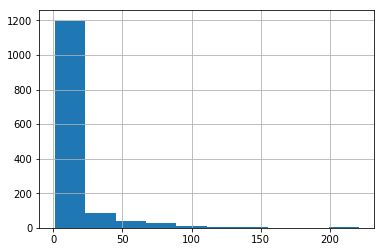

In [20]:
df[df['user_id'] == 'user_000005']['listen_count'].hist()

In [21]:
test_counts = df[df['user_id'] == 'user_000005']['listen_count']

In [22]:
test_counts.unique()

array([ 14,   9,   8,   2,  10,   1,   4,  11,  25,   5,   3,  12,  21,
        26,  13,   7,  23,  30,   6,  18,  38, 134,  45,  15,  36,  17,
        16,  29, 207,  31,  19,  78,  44, 116,  61,  68,  40,  32,  39,
        33,  34,  46,  35,  22,  42,  80,  27,  20,  67,  51,  24,  81,
        69, 106,  56,  79,  62,  91,  60, 146,  49,  48, 110,  71,  41,
        95,  83,  50,  28, 137,  52,  76, 121,  74, 147,  63, 114,  59,
       104, 191,  75,  72, 221, 120,  94,  47,  84,  43,  58,  65, 102,
        37,  66,  55,  90, 128, 124], dtype=int64)

In [23]:
test_counts.describe()

count    1378.000000
mean       11.175617
std        22.440100
min         1.000000
25%         1.000000
50%         4.000000
75%         8.000000
max       221.000000
Name: listen_count, dtype: float64

Listen count is definitely not normal nor uniform. It's closer to some kind of exponential distribution. How to normalize it to a rating system?

In [24]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler

C:\Users\kaiser\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


(array([    0.,     0.,     0.,     0.,     0.,  1378.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

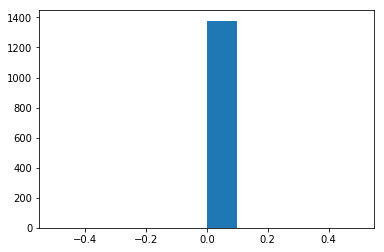

In [25]:
scaler = RobustScaler()
plt.hist(scaler.fit_transform(test_counts.reshape(1, -1))[0])

C:\Users\kaiser\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\kaiser\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


(array([    0.,     0.,     0.,     0.,     0.,  1378.,     0.,     0.,
            0.,     0.]),
 array([ 54.5,  54.6,  54.7,  54.8,  54.9,  55. ,  55.1,  55.2,  55.3,
         55.4,  55.5]),
 <a list of 10 Patch objects>)

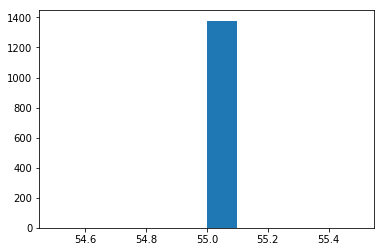

In [26]:
scaler = MinMaxScaler((55, 100))
plt.hist(scaler.fit_transform(df[df['user_id'] == 'user_000005']['listen_count'].reshape(1, -1))[0])

These scalers don't seem to be working...

...but what if we use the quantiles? Up to the 50% quantile will be considered 3 stars, up to 75% is 4 stars and above that, 5. Let's try!

In [27]:
import numpy as np

In [28]:
df['rating'] = np.nan
df.head()

,user_id,track_id,listen_count,rating
0,user_000001,00237585-8e04-4cd5-a785-f2185492ab0b,2,NaN
1,user_000001,0024d72c-136f-49f2-9078-ce4b39b94d3f,4,NaN
2,user_000001,0025055f-39c3-43e2-b874-3bf42bbc9212,2,NaN
3,user_000001,002e254d-4624-49f4-b78a-b40711b9e4f3,3,NaN
4,user_000001,00b07689-ec4c-4773-94ce-06f3d198431e,4,NaN


In [63]:
def create_ratings_for_user(df, user_id):
    sel_user = df['user_id'] == user_id
    user_data = df[sel_user]
    three_stars_limit = user_data['listen_count'].quantile(.5)
    four_stars_limit = user_data['listen_count'].quantile(.75)
    
    sel_3_stars = sel_user & (df['listen_count'] < three_stars_limit)
    df.loc[sel_3_stars, 'rating'] = 3
    
    sel_4_stars = sel_user & (df['listen_count'] >= three_stars_limit) & (df['listen_count'] <= four_stars_limit)
    df.loc[sel_4_stars, 'rating'] = 4
    
    sel_5_stars = sel_user & (df['listen_count'] > four_stars_limit)
    df.loc[sel_5_stars, 'rating'] = 5

In [64]:
create_ratings_for_user(df, 'user_000195')
df[df['user_id'] == 'user_000195'].sample(10)

,user_id,track_id,listen_count,rating
764318,user_000195,0082c07b-2dac-4a38-a484-b32715a406e6,7,4.0
765286,user_000195,eca55467-116f-429d-aa2f-95b746dab5d1,1,3.0
764717,user_000195,65e278c3-1bcf-4d56-8900-1e4aaa0d2a31,40,5.0
764806,user_000195,78625f8a-6a80-4013-9169-2b8e974c7729,5,3.0
764617,user_000195,49b69ccc-d3cf-47ac-afc1-01231329cedd,51,5.0
764406,user_000195,17349c1e-7e72-40d8-8f30-adb594dd0105,1,3.0
764665,user_000195,58e22fea-1613-4a96-8cc0-b12e9b01566b,32,4.0
765024,user_000195,ade7b229-393a-4c99-9d71-b39f05d96ab9,4,3.0
764355,user_000195,081f204b-5460-43c9-be9c-3643acefc3c1,1,3.0
765227,user_000195,df8c94da-f884-4f22-af08-df9d40275d39,3,3.0


In [60]:
sel = df['user_id'] == 'user_000195'
sel &= df['listen_count'] >= 6
sel &= df['listen_count'] <= 33
df.loc[sel, 'rating'] = 4
df[df['user_id'] == 'user_000195'].sample(10)

,user_id,track_id,listen_count,rating
765245,user_000195,e273ed0f-6cc6-4fec-83cd-e2da18b2f96d,5,3.0
765249,user_000195,e36ec73e-c99e-4369-8af5-825db0dd93bf,44,5.0
764644,user_000195,53de73c2-7e32-44b5-900d-1c1843c215e9,7,4.0
765309,user_000195,f262704d-fc7e-4007-ab46-8350442b6dea,44,5.0
765320,user_000195,f4464442-50c6-42a2-b01f-521a6019337d,1,3.0
764544,user_000195,36d2430a-d115-491f-87da-16f1a1cad152,4,3.0
764383,user_000195,0f961de5-9cd4-4744-9520-ce24b807438e,3,3.0
764496,user_000195,2c3e2373-065c-492b-86dd-47ffb9471635,26,4.0
765063,user_000195,b84297a1-6f61-44d5-a357-e31772212bad,1,3.0
764517,user_000195,300a398f-f933-4dbd-b0b3-a0fc47e8339c,11,4.0


In [65]:
for user in df['user_id'].unique():
    create_ratings_for_user(df, user)

In [67]:
df[df['user_id'] == 'user_000195'].sample(10)

,user_id,track_id,listen_count,rating
764904,user_000195,921130c1-4887-42e2-a075-0c65416f2526,14,4.0
765342,user_000195,fa86d550-9deb-43d8-bad8-3e195ff75a6e,3,3.0
764818,user_000195,7b30170f-3126-406b-8a7f-09adce541ba6,15,4.0
764977,user_000195,a1f417f4-08d7-4b29-b96e-7088ccfa8210,11,4.0
764672,user_000195,59fd9ca4-6b79-4531-9307-e19ca4bbf983,44,5.0
764774,user_000195,7286a5e2-8a2a-4470-bdd5-588ddc2786b6,9,4.0
764552,user_000195,384b0bb5-0487-4f4a-9274-72acf36cfff9,1,3.0
764803,user_000195,77d984be-b665-4c82-88e8-4f5e48e66485,49,5.0
764895,user_000195,8f1466ce-dd73-456d-b7f5-435bc6a44f60,23,4.0
765282,user_000195,ebf2bd09-7dba-4a34-88c4-8dd618d14c94,87,5.0


In [68]:
df.to_csv('lastfm_data/data_naive_rating.csv')

## Getting the new df to Surprise

In [32]:
from surprise import Reader

In [70]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df[['user_id', 'track_id', 'rating']], reader)

## Testing SVD with the naive ratings

In [71]:
algo = SVD()
trainset, testset = train_test_split(data, test_size=.25)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.6622


0.66215115578158934

In [73]:
uid = 'user_000195'
iid = '2c3e2373-065c-492b-86dd-47ffb9471635'

pred = algo.predict(uid, iid, r_ui=4, verbose=True)

user: user_000195 item: 2c3e2373-065c-492b-86dd-47ffb9471635 r_ui = 4.00   est = 3.61   {'was_impossible': False}


In [74]:
iid = 'e36ec73e-c99e-4369-8af5-825db0dd93bf'

pred = algo.predict(uid, iid, r_ui=5, verbose=True)

user: user_000195 item: e36ec73e-c99e-4369-8af5-825db0dd93bf r_ui = 5.00   est = 4.06   {'was_impossible': False}


In [75]:
iid = 'e273ed0f-6cc6-4fec-83cd-e2da18b2f96d'

pred = algo.predict(uid, iid, r_ui=3, verbose=True)

user: user_000195 item: e273ed0f-6cc6-4fec-83cd-e2da18b2f96d r_ui = 3.00   est = 4.01   {'was_impossible': False}


## Using KNN

In [76]:
algo = KNNBasic()
trainset, testset = train_test_split(data, test_size=.25)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7313


0.73131168910871502

In [77]:
uid = 'user_000195'
iid = '2c3e2373-065c-492b-86dd-47ffb9471635'

pred = algo.predict(uid, iid, r_ui=4, verbose=True)

user: user_000195 item: 2c3e2373-065c-492b-86dd-47ffb9471635 r_ui = 4.00   est = 3.94   {'actual_k': 11, 'was_impossible': False}


In [78]:
iid = 'e36ec73e-c99e-4369-8af5-825db0dd93bf'

pred = algo.predict(uid, iid, r_ui=5, verbose=True)

user: user_000195 item: e36ec73e-c99e-4369-8af5-825db0dd93bf r_ui = 5.00   est = 4.11   {'actual_k': 8, 'was_impossible': False}


In [79]:
iid = 'e273ed0f-6cc6-4fec-83cd-e2da18b2f96d'

pred = algo.predict(uid, iid, r_ui=3, verbose=True)

user: user_000195 item: e273ed0f-6cc6-4fec-83cd-e2da18b2f96d r_ui = 3.00   est = 4.10   {'actual_k': 16, 'was_impossible': False}


In [80]:
iid = '17349c1e-7e72-40d8-8f30-adb594dd0105'

pred = algo.predict(uid, iid, r_ui=3, verbose=True)

user: user_000195 item: 17349c1e-7e72-40d8-8f30-adb594dd0105 r_ui = 3.00   est = 3.00   {'actual_k': 1, 'was_impossible': False}
